In [1]:
import numpy as np
import cv2
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
from PIL import Image
import sys

In [2]:
image=cv2.imread('110.jpg',0)

In [3]:
image=cv2.resize(image,(100,100))

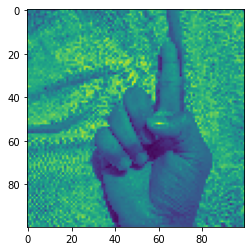

In [4]:
plt.imshow(image)
plt.show()

In [5]:
blur_image=cv2.blur(image,(3,3))

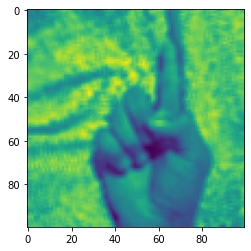

In [6]:
plt.imshow(blur_image)
plt.show()

In [7]:
edge=cv2.Canny(image,200,100)

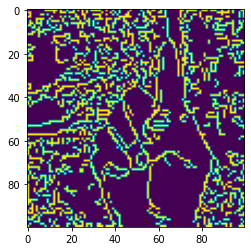

In [8]:
plt.imshow(edge)
plt.show()

In [9]:
flag = False 

class Hand():
    IMG_SIZE = 100
    ZERO="D://Project//Machine Learning Projects//Datasets//Hand_sign//0"
    ONE="D://Project//Machine Learning Projects//Datasets//Hand_sign//1"
    TWO="D://Project//Machine Learning Projects//Datasets//Hand_sign//2"
    THREE="D://Project//Machine Learning Projects//Datasets//Hand_sign//3"
    FOUR="D://Project//Machine Learning Projects//Datasets//Hand_sign//4"
    FIVE="D://Project//Machine Learning Projects//Datasets//Hand_sign//5"
    
    LABELS = {ZERO: 0, ONE: 1, TWO: 2, THREE: 3, FOUR: 4, FIVE: 5}
    
    training_data = []

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for image in tqdm(os.listdir(label)): # find all images in one file then other files also(loop)
                if "jpg" in image:
                    try:
                        path = os.path.join(label, image) # join label location with image location(ex in file one different image has different location)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(6)[self.LABELS[label]]]) # [1 ,0 ,0 ,0 ,0 ,0] [0 ,0 ,0 ,1 ,0 ,0]

                    except Exception as e:
                        pass
                        

        np.random.shuffle(self.training_data)
        np.save("hand_sign_array_data.npy", self.training_data)

if flag:
    signs = Hand()
    signs.make_training_data()

In [7]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [28]:
ZERO="D://Project//Machine Learning Projects//Datasets//Hand_sign//0"
ONE="D://Project//Machine Learning Projects//Datasets//Hand_sign//1"
TWO="D://Project//Machine Learning Projects//Datasets//Hand_sign//2"
THREE="D://Project//Machine Learning Projects//Datasets//Hand_sign//3"
FOUR="D://Project//Machine Learning Projects//Datasets//Hand_sign//4"
FIVE="D://Project//Machine Learning Projects//Datasets//Hand_sign//5"

LABELS2 = {ZERO: 0, ONE: 1, TWO: 2, THREE: 3, FOUR: 4, FIVE: 5}
for label in LABELS2:
    print(label)
    print(LABELS2[label])

D://Project//Machine Learning Projects//Datasets//Hand_sign//0
0
D://Project//Machine Learning Projects//Datasets//Hand_sign//1
1
D://Project//Machine Learning Projects//Datasets//Hand_sign//2
2
D://Project//Machine Learning Projects//Datasets//Hand_sign//3
3
D://Project//Machine Learning Projects//Datasets//Hand_sign//4
4
D://Project//Machine Learning Projects//Datasets//Hand_sign//5
5


In [2]:
training_data=np.load('hand_sign_array_data.npy',allow_pickle=True)

In [3]:
len(training_data)

1185

[[193 186 196 ... 160 156 161]
 [193 193 198 ... 159 157 156]
 [200 195 191 ... 148 158 158]
 ...
 [ 46  47  50 ...  92 100  92]
 [ 49  49  53 ...  97  94  98]
 [ 51  46  46 ...  87  93  89]]
[0. 0. 1. 0. 0. 0.]


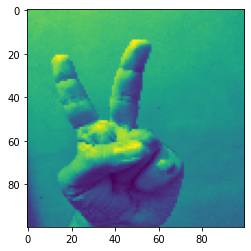

[[194 193 196 ... 151 158 145]
 [191 195 194 ... 153 144 149]
 [195 192 191 ... 154 156 152]
 ...
 [ 81  90  99 ...  91  90  91]
 [ 74  92 100 ...  89  93  87]
 [ 74  78  92 ...  93  86  89]]
[0. 0. 1. 0. 0. 0.]


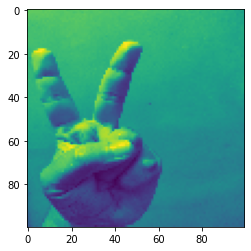

[[194 193 196 ... 151 158 145]
 [191 195 194 ... 153 144 149]
 [195 192 191 ... 154 156 152]
 ...
 [ 81  90  99 ...  91  90  91]
 [ 74  92 100 ...  89  93  87]
 [ 74  78  92 ...  93  86  89]]
[0. 0. 1. 0. 0. 0.]


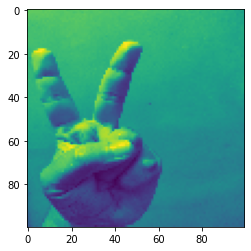

[[179 185 184 ... 149 141 144]
 [180 179 176 ... 151 147 141]
 [176 174 179 ... 145 145 155]
 ...
 [ 36  38  42 ...  76  78  81]
 [ 35  40  39 ...  78  81  80]
 [ 37  40  42 ...  76  81  79]]
[0. 0. 0. 0. 0. 1.]


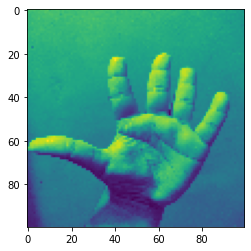

[[183 185 183 ... 159 158 156]
 [182 181 188 ... 158 157 156]
 [179 182 183 ... 157 161 160]
 ...
 [ 55  63  73 ...  97  99  90]
 [ 50  57  71 ...  98  92  97]
 [ 50  56  65 ...  93  88  89]]
[0. 1. 0. 0. 0. 0.]


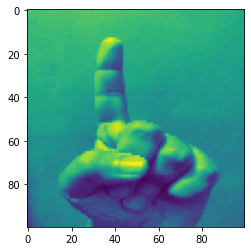

[[190 191 190 ... 157 154 153]
 [190 189 187 ... 156 153 149]
 [187 185 188 ... 156 152 153]
 ...
 [ 41  38  45 ...  84  82  84]
 [ 35  40  43 ...  80  81  84]
 [ 43  38  44 ...  79  81  80]]
[0. 0. 0. 0. 0. 1.]


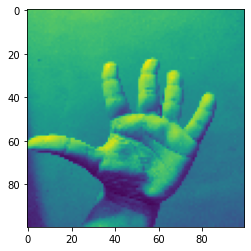

[[183 185 183 ... 159 158 156]
 [182 181 188 ... 158 157 156]
 [179 182 183 ... 157 161 160]
 ...
 [ 55  63  73 ...  97  99  90]
 [ 50  57  71 ...  98  92  97]
 [ 50  56  65 ...  93  88  89]]
[0. 1. 0. 0. 0. 0.]


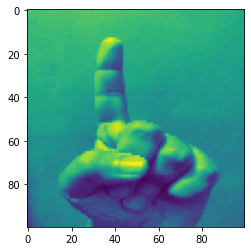

[[175 181 184 ... 152 151 147]
 [179 180 182 ... 148 150 148]
 [177 180 182 ... 147 147 142]
 ...
 [ 41  41  55 ...  78  83  87]
 [ 40  43  46 ...  90  80  84]
 [ 40  40  46 ...  83  85  78]]
[0. 0. 0. 0. 0. 1.]


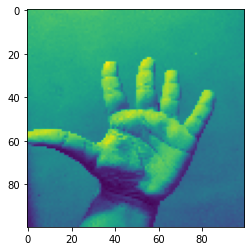

[[112 129 138 ... 162 159 158]
 [109 128 138 ... 157 160 154]
 [100 121 134 ... 157 160 161]
 ...
 [ 56  53  60 ...  83 100  93]
 [ 50  55  55 ...  99  91  92]
 [ 57  55  53 ...  93  92  88]]
[0. 0. 0. 1. 0. 0.]


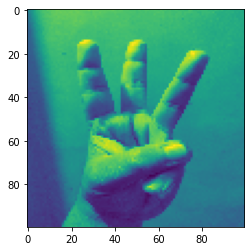

[[183 181 180 ... 155 157 157]
 [181 183 179 ... 163 156 155]
 [176 179 179 ... 157 156 157]
 ...
 [ 87  99 105 ...  97  90  77]
 [ 86  98 103 ...  95  95  96]
 [ 83  99  98 ...  95  90  89]]
[0. 1. 0. 0. 0. 0.]


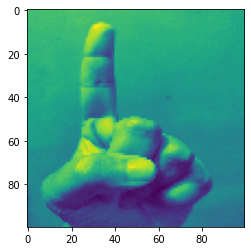

[[195 195 194 ... 146 149 149]
 [191 190 193 ... 151 146 151]
 [187 189 191 ... 153 150 149]
 ...
 [ 51  51  50 ...  94  95  92]
 [ 48  48  46 ...  89  93  86]
 [ 42  46  49 ...  91  86  84]]
[0. 1. 0. 0. 0. 0.]


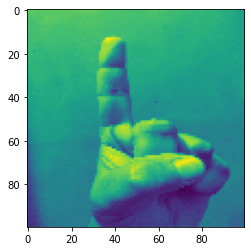

[[192 194 199 ... 148 147 148]
 [190 192 193 ... 146 149 142]
 [187 187 183 ... 150 151 143]
 ...
 [ 49  54  62 ...  87  82  80]
 [ 50  51 149 ...  83  79  80]
 [ 49  54 153 ...  93  85  86]]
[0. 0. 0. 1. 0. 0.]


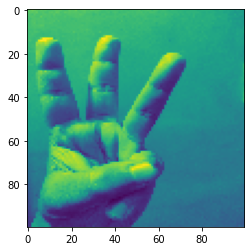

[[193 196 193 ... 157 154 153]
 [191 193 193 ... 155 150 151]
 [190 192 193 ... 157 156 145]
 ...
 [ 93  96 101 ...  96  97 101]
 [ 89  97 100 ...  93  99  94]
 [ 93  97 105 ...  92  89  95]]
[0. 0. 0. 0. 1. 0.]


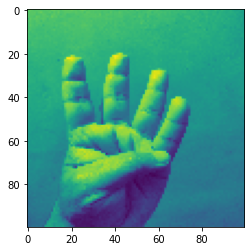

[[112 129 138 ... 162 159 158]
 [109 128 138 ... 157 160 154]
 [100 121 134 ... 157 160 161]
 ...
 [ 56  53  60 ...  83 100  93]
 [ 50  55  55 ...  99  91  92]
 [ 57  55  53 ...  93  92  88]]
[0. 0. 0. 1. 0. 0.]


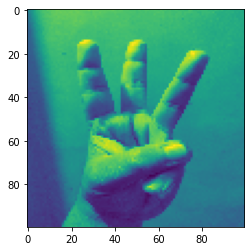

[[192 194 199 ... 148 147 148]
 [190 192 193 ... 146 149 142]
 [187 187 183 ... 150 151 143]
 ...
 [ 49  54  62 ...  87  82  80]
 [ 50  51 149 ...  83  79  80]
 [ 49  54 153 ...  93  85  86]]
[0. 0. 0. 1. 0. 0.]


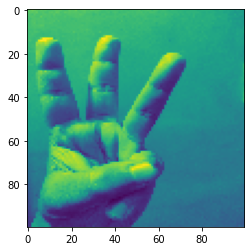

[[183 185 183 ... 159 158 156]
 [182 181 188 ... 158 157 156]
 [179 182 183 ... 157 161 160]
 ...
 [ 55  63  73 ...  97  99  90]
 [ 50  57  71 ...  98  92  97]
 [ 50  56  65 ...  93  88  89]]
[0. 1. 0. 0. 0. 0.]


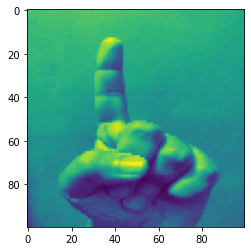

[[191 188 197 ... 155 160 146]
 [187 189 191 ... 150 146 148]
 [193 190 194 ... 158 151 138]
 ...
 [ 91  94  99 ...  92  94  90]
 [ 89 100  97 ...  93  88  91]
 [ 84  94  93 ...  96  89 102]]
[0. 0. 0. 0. 1. 0.]


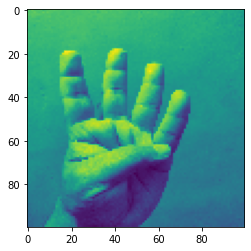

[[176 177 180 ... 148 157 153]
 [175 175 176 ... 148 151 151]
 [173 169 171 ... 146 144 145]
 ...
 [108 105 106 ...  98 104  96]
 [107 101 104 ...  87  94  91]
 [101 101 103 ...  89  91  89]]
[0. 0. 0. 1. 0. 0.]


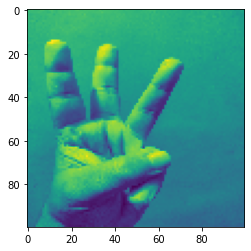

[[192 194 199 ... 148 147 148]
 [190 192 193 ... 146 149 142]
 [187 187 183 ... 150 151 143]
 ...
 [ 49  54  62 ...  87  82  80]
 [ 50  51 149 ...  83  79  80]
 [ 49  54 153 ...  93  85  86]]
[0. 0. 0. 1. 0. 0.]


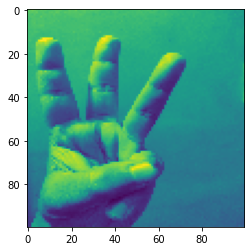

[[192 191 193 ... 151 148 148]
 [196 199 191 ... 151 156 148]
 [192 190 191 ... 158 156 152]
 ...
 [ 84  99  99 ...  96  95  93]
 [ 90  94 100 ...  94  91  93]
 [ 84  91  96 ...  88  96  89]]
[0. 0. 0. 0. 1. 0.]


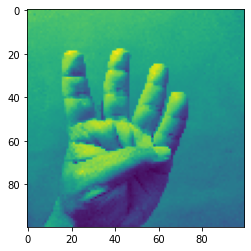

In [5]:
a=0
for i in training_data:
    print(i[0])
    print(i[1])
    plt.imshow(i[0])
    plt.show()
    a+=1
    if a==20:
        break

In [5]:
X = torch.Tensor([i[0] for i in training_data]).view(-1,100,100)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

In [8]:
layer = [
    torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5), 
    torch.nn.MaxPool2d(2,2),
    torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5), 
    torch.nn.MaxPool2d(2,2),
    torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5),
    torch.nn.MaxPool2d(2,2),

]
 
 


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5) 
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        self.fc1 = nn.Linear(128*9*9, 512) #flattening. output= (n-f+2p)/s
        self.fc2 = nn.Linear(512, 6) 

    def forward(self, x):
        
        x=x
        
        x=self.conv1(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2)
        
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2) 

        x=self.conv3(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2)
        
        x = x.view(-1, 128*9*9) 
        
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x) 
        return F.softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=10368, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=6, bias=True)
)


In [11]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [13]:
val_size = int(len(X)* 0.3 )
print(val_size)

355


In [14]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]
print(len(train_X), len(test_X))


830 355


In [15]:
BATCH_SIZE =50
EPOCHS =5

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):     
        
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 100, 100)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch}. Loss: {loss}")

  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Epoch: 0. Loss: 0.016172118484973907


  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Epoch: 1. Loss: 2.5605731934774667e-05


  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Epoch: 2. Loss: 1.1355064799545289e-07


  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

Epoch: 3. Loss: 2.9172553261958e-09


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:16<00:00,  1.05it/s]

Epoch: 4. Loss: 6.800142671181675e-10


In [16]:
print("The state dict keys: \n\n", net.state_dict().keys())

The state dict keys: 

 odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


In [17]:
print(test_X[0])

tensor([[0.7490, 0.7373, 0.7725,  ..., 0.6078, 0.6275, 0.5725],
        [0.7333, 0.7412, 0.7490,  ..., 0.5882, 0.5725, 0.5804],
        [0.7569, 0.7451, 0.7608,  ..., 0.6196, 0.5922, 0.5412],
        ...,
        [0.3569, 0.3686, 0.3882,  ..., 0.3608, 0.3686, 0.3529],
        [0.3490, 0.3922, 0.3804,  ..., 0.3647, 0.3451, 0.3569],
        [0.3294, 0.3686, 0.3647,  ..., 0.3765, 0.3490, 0.4000]])


In [18]:
net_out = net(test_X[10].view(-1, 1, 100, 100))[0] 
predicted_class = torch.argmax(net_out)

In [19]:
predicted_class

tensor(1)

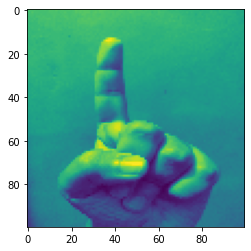

In [20]:
plt.imshow(test_X[10])
plt.show()

In [21]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 100, 100))[0] 
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print(correct)
print(total)
print("Accuracy: ", round(correct/total, 3))

100%|███████████████████████████████████████████████████████████████████████████████| 355/355 [00:03<00:00, 106.68it/s]

355
355
Accuracy:  1.0


In [22]:
PATH = './Hand_Finger.pth'
torch.save(net.state_dict(), PATH)


In [23]:
net.load_state_dict(torch.load("Hand_Finger.pth"))
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=10368, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=6, bias=True)
)

In [39]:
def nothing(x):
    pass

transform = transforms.Compose([
                                transforms.Resize(100),
                                transforms.CenterCrop(100),
                                transforms.ToTensor(),
                               ])

def image_loader(image_name):
    image = Image.open(image_name)
    image = image.convert('RGB')
    image = transform(image).float()
    image = image.unsqueeze(0) 
    return image  

In [41]:
cap.release()
cv2.destroyAllWindows()